In [5]:
using DataFrames
using CSV
using Plots
using StatsPlots 
using Plots.PlotMeasures

In [22]:
gr()

Plots.GRBackend()

In [8]:
# theme(:wong2)

In [9]:
# ps_stack = []
# for C in ["0.01", "1.0"], ep in ["0.01", "1.0"]
#     ps = []
#     for i in 1:5
#         df = CSV.File("../insights/convergence/animals_regmh_$(ep)_$(C)_1.0_$i.csv") |> DataFrame
#         df[:, :runs] .= 1:size(df, 1)
#         p = if i != 1
#             @df df plot(:runs, [:mcl :p_lkhd], 
#                         xrotation=40, leg=false, labels=nothing, 
#                         framestyle=:box, alpha=0.8,
#                         palette=["#60100B", "#ABABAB"],
#                         linestyle=[:dot :solid],
#                         tickfontsize=5,
#                         left_margin=0.5mm, 
#                         yticks=nothing)
#         else
#             @df df plot(:runs, [:mcl :p_lkhd],
#                         xrotation=40, 
#                         labels=["CDL" "RCDL"],
#                         framestyle=:box, alpha=0.8,
#                         palette=["black", "#ABABAB"],
#                         linestyle=[:dot :solid],
#                         tickfontsize=5,
#                         legendfontsize=5, left_margin=0.5mm)
# #                         leg=false, labels=nothing,)
#         end 
#         push!(ps, p)
#     end
#     l = @layout [
#         grid(1, 5)  
#         b{0.000001h}
#     ]
#     extra_p0 = plot(framestyle=:none, margin=0mm)
#     p = plot(ps..., extra_p0, layout=l,
#              link=:y, leg=:bottomright,
#              size=(600, 130))
#     savefig(p, "./animals_regmh_$(C)_$(ep)_conv.pdf")   
# end 
# 
        

In [10]:

function plot_conv(dn, Cs, eps)
    for C in Cs, ep in eps
        ps = []
        for i in 1:5
            df = CSV.File("../insights/convergence/$(dn)_regmh_$(ep)_$(C)_1.0_$i.csv") |> DataFrame
            df[:, :runs] .= 1:size(df, 1)
            p = if i != 1
                @df df plot(:runs, [:mcl :p_lkhd], 
                            xrotation=40, leg=false, labels=nothing, 
                            framestyle=:box, alpha=1,
                            palette=["#E69F00", "#999999"],
                            linestyle=[:dashdot :solid],
                            marker=[:none :none],
                            tickfontsize=5,
                            grid=:off,
                            left_margin=0.5mm, 
                            yticks=nothing)
            else
                @df df plot(:runs, [:mcl :p_lkhd],
                            xrotation=40, 
                            labels=["CDL" "RCDL"],
                            framestyle=:box, alpha=1,
                            linestyle=[:dashdot :solid],
                            marker=[:none :none],
                            palette=["#E69F00", "#999999"],
                            grid=:off,
                            tickfontsize=5,
                            legendfontsize=5, left_margin=0.5mm)
            end 
            push!(ps, p)
        end
        l = @layout [
            grid(1, 5)  
            b{0.000001h}
        ]
        extra_p0 = plot(framestyle=:none, margin=0mm)
        p = plot(ps..., extra_p0, layout=l,
                 leg=:bottomright,
                 size=(550, 120),
                 tickfontsize=4)
        savefig(p, "./$(dn)_regmh_$(C)_$(ep)_conv.pdf")
    end 
end 

plot_conv (generic function with 1 method)

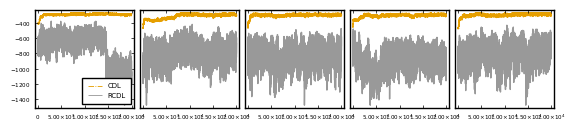

In [20]:
plot_conv("animals", ["0.01", "1.0"], ["0.01", "1.0"])

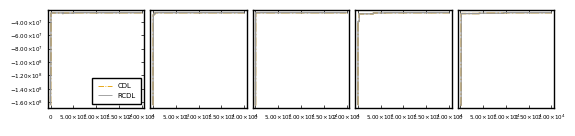

In [21]:
plot_conv("fmnist", ["0.01", "1.0", "0.0001"], ["0.01", "1.0"])

In [6]:
function transform(dn, Cs, eps)
    for C in Cs, ep in eps
        dfs = []
        for i in 2:5
            df = CSV.File("../insights/convergence/$(dn)_regmh_$(ep)_$(C)_1.0_$i.csv") |> DataFrame
            
            mcl = [x for (i, x) in enumerate(df.mcl) if i % 50 == 1]
            df1 = DataFrame(val=df.mcl)
            df1[:, :sampleindex] .= "Chain $(i-1)" 
            df1[:, :lkhdtype] .= "CDL"
            df1[:, :iteration] .= Vector(1:size(df, 1)) / 5000
            
            df2 = DataFrame(val=df.p_lkhd)
            df2[:, :sampleindex] .= "Chain $(i-1)" 
            df2[:, :lkhdtype] .= "PCDL"
            df2[:, :iteration] .= Vector(1:size(df, 1)) / 5000
            
            push!(dfs, vcat(df1, df2))
        end
        df_ = vcat(dfs...)
        
        open("$(dn)_regmh_$(ep)_$(C)_processed.csv", "w") do io
            CSV.write(io, df_)
        end
    end
end 

transform (generic function with 1 method)

In [7]:
transform("animals", ["0.01", "1.0"], ["0.01", "1.0"])

In [8]:
transform("fmnist", ["0.001", "1.0"], ["0.001", "1.0"])

In [8]:
function transform2(dn, Cs, eps)
    for C in Cs, ep in eps
        dfs = []
        for i in 1:5
            df = CSV.File("../insights/convergence/$(dn)_regmh_$(ep)_$(C)_1.0_$i.csv") |> DataFrame
            
            mcl = [x for (i, x) in enumerate(df.mcl) if i % 50 == 1]
            df1 = DataFrame(val=mcl)
            df1[:, :sampleindex] .= "Chain $i" 
            df1[:, :lkhdtype] .= "CDL"
            df1[:, :iteration] .= 1:length(mcl)
            
            pmcl = [x for (i, x) in enumerate(df.p_lkhd) if i % 50 == 1]
            df2 = DataFrame(val=pmcl)
            df2[:, :sampleindex] .= "Chain $i" 
            df2[:, :lkhdtype] .= "PCDL"
            df2[:, :iteration] .= 1:length(pmcl)
            
            push!(dfs, vcat(df1, df2))
        end
        df_ = vcat(dfs...)
        
        open("$(dn)_regmh_$(ep)_$(C)_processed.csv", "w") do io
            CSV.write(io, df_)
        end
    end
end 

transform2 (generic function with 1 method)

In [9]:
transform2("animals", ["0.01", "1.0"], ["0.01", "1.0"])